# Group Assignment #3 - Cleaning Midterm Assignment with Functions/Loops

##### Contributor: Emily Cadena

## Who’s Most at Risk? Social Demographics and Traffic Collisions in the City of Los Angeles

### Our research will evaluate different socio-demographic characteristics, such as median household income, race and ethnicity, and age to explore which communities are most susceptible to traffic collisions in the City of Los Angeles. This notebook will explore race and ethnicity in the City of LA. Unlike the previous assignment, I focused on LA County. 

## Data Sources & Geographic Information

American Community Survey (ACS) 2015-2019 (5-Year Estimates) - Hispanic or Latino by Race  
2019 Census Tracts from IPUMS NHGIS

### Importing libraries

In [39]:
# importing pandas for data exploration 
import pandas as pd
import geopandas as gpd

# importing for plots and tables 
import matplotlib.pyplot as plt
import contextily as ctx

#importing for interactive plots 
import plotly.express as px

In [40]:
# upload acs 2015-2019 for data exploration
race = pd.read_csv('data4/race15_19.csv')

### Converting Data Types

In [41]:
# going into the Geo_FIPS column
# leading zero is missing 
race.Geo_FIPS.head()

0    6037101110
1    6037101122
2    6037101210
3    6037101220
4    6037101300
Name: Geo_FIPS, dtype: int64

In [42]:
# converting FIPS, state, and county data type from integer to string to include leading zero 
race = pd.read_csv('data4/race15_19.csv',
     dtype=
                 {'Geo_FIPS': str, 
                  'Geo_STATE': str, 
                  'Geo_COUNTY': str })

### Cleaning and Reorganizing the data 

In [43]:
# find unnecessary columns with zero values 
race.columns[race.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_PLACESE',
 'Geo_PUMA1']

In [44]:
# deleting uncessary columns 
race = race.dropna(axis=1,how="all")

In [45]:
# keep columns
columns_to_keep = ['Geo_FIPS', 
                   'Geo_STATE', 
                   'Geo_COUNTY',
                   'Geo_TRACT',
                   'SE_B04001_001', 
                   'SE_B04001_002', 
                   'SE_B04001_003',      
                   'SE_B04001_004',       
                   'SE_B04001_005',        
                   'SE_B04001_006',       
                   'SE_B04001_007',        
                   'SE_B04001_008',       
                   'SE_B04001_009',      
                   'SE_B04001_010',      
                   'PCT_SE_B04001_002',  
                   'PCT_SE_B04001_003',
                   'PCT_SE_B04001_004',  
                   'PCT_SE_B04001_005',  
                   'PCT_SE_B04001_006',  
                   'PCT_SE_B04001_007',  
                   'PCT_SE_B04001_008',  
                   'PCT_SE_B04001_009',  
                   'PCT_SE_B04001_010']

race=race[columns_to_keep]
                   

In [46]:
race.columns.to_list()

['Geo_FIPS',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'SE_B04001_001',
 'SE_B04001_002',
 'SE_B04001_003',
 'SE_B04001_004',
 'SE_B04001_005',
 'SE_B04001_006',
 'SE_B04001_007',
 'SE_B04001_008',
 'SE_B04001_009',
 'SE_B04001_010',
 'PCT_SE_B04001_002',
 'PCT_SE_B04001_003',
 'PCT_SE_B04001_004',
 'PCT_SE_B04001_005',
 'PCT_SE_B04001_006',
 'PCT_SE_B04001_007',
 'PCT_SE_B04001_008',
 'PCT_SE_B04001_009',
 'PCT_SE_B04001_010']

In [47]:
# rename columns
# % is total population XXX (ex. % Total Population: Hispanic or Latino)
race.columns = ['FIPS',
                'State',
                'County',
                'Census Tract',
                'Total Population',
                'Total Population: Not Hispanic or Latino',
                'White',
                'Black',
                'American Indian and Alaska Native Alone',
                'Asian',
                'Native Hawaiian and Other Pacific Islander Alone',
                'Some Other Race Alone',
                'Two or More Races',
                'Hispanic or Latino',
                '% Not Hispanic or Latino',
                '% White',
                '% Black',
                '% American Indian and Alaska Native Alone',
                '% Asian',
                '% Native Hawaiian and Other Pacific Islander Alone',
                '% Some Other Race Alone',
                '% Two or More Races',
                '% Hispanic or Latino']
                    

# Merge

### Since we want the City of LA instead of the entire county, we must merge the City of LA Census tracts with the LA County census data. Merging allows us to create maps and charts with data only in the City of LA. 

In [48]:
# add city of LA census tract 
cityofla=gpd.read_file('data4/cityLA.zip')

In [49]:
# add a FIPS column
# creating a new column so that I can merge the shapefile and census tracts 

cityofla['FIPS'] = '06' + '037' + cityofla['TRACTCE']

In [50]:
# need to merge by creating a new dataframe
la_race =cityofla.merge(race,on="FIPS")

In [51]:
# find the sum for each race and ethncity 
print(la_race['White'].sum())
print(la_race['Black'].sum())
print(la_race['Asian'].sum())
print(la_race['Hispanic or Latino'].sum())

1378808
430875
543767
2220293


In [52]:
#racebar1 only includes data for reach race and ethnicity in the City of LA  

racebar1 = racebar1=pd.DataFrame({'Race and Ethnicity':['White', 'Black', 'Asian', 'Hispanic or Latino'], 
                   'Population Count':[1378808, 430875, 543767, 2220293], 
                   'Color':['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']}) 


In [53]:
# creating a bar chart of race and ethnicty in LA County using plotly 
fig = px.bar(racebar1, 
       x='Race and Ethnicity',
       y='Population Count',
       title='Race & Ethnicity in the City of Los Angeles, 2019',
       color='Race and Ethnicity', 
       color_discrete_sequence=racebar1['Color'])
    
# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

fig.update_layout(xaxis_tickangle=0, 
                  plot_bgcolor='rgba(0,0,0,0)',
                  paper_bgcolor='rgba(0,0,0,0)'
                 )
 
# show the figure
fig.show()


# Function and loop for Race & Ethnicity 

In [54]:
# Created a function here because eventually, I want to loop through VARIOUS columns instead of unique values within ONE Column 

def plot_maps(data, columns, title_prefix):  

     for column in columns:
        fig, ax = plt.subplots(1, 1, figsize=(12, 12))
        la_race.plot(ax=ax,column=column,legend=True,cmap='GnBu',
             legend_kwds={"label": "Population (%)", "orientation": "vertical"})
      
        ax.axis('off')
        ax.set_title (f" {column} {title_prefix}")

In [55]:
#columns to plot 
race_map = ['% White', '% Black', '% Asian', '% Hispanic or Latino']

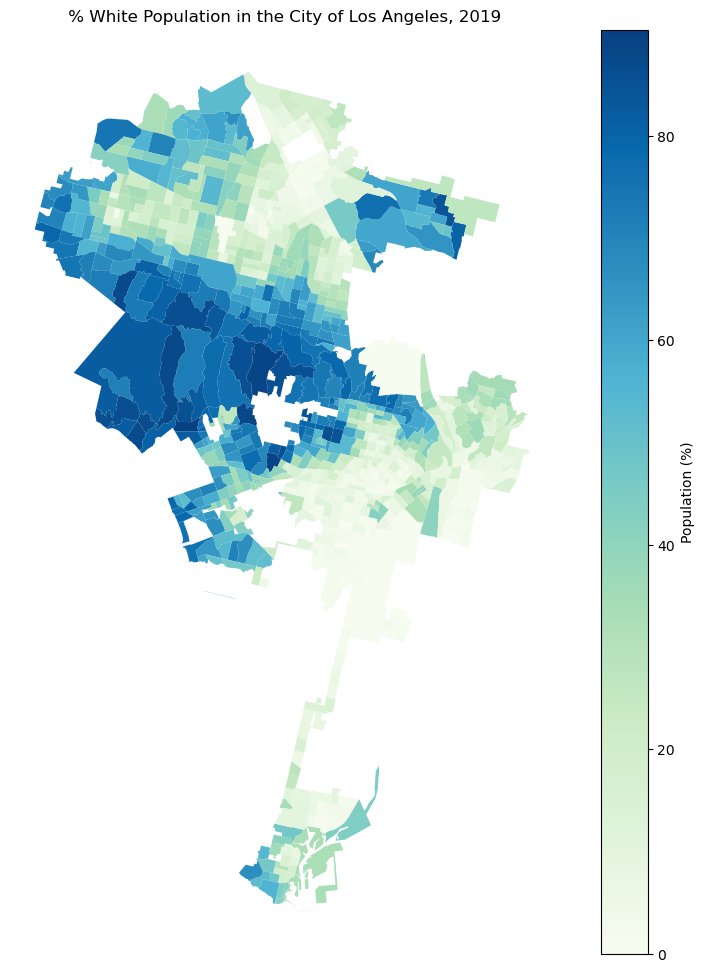

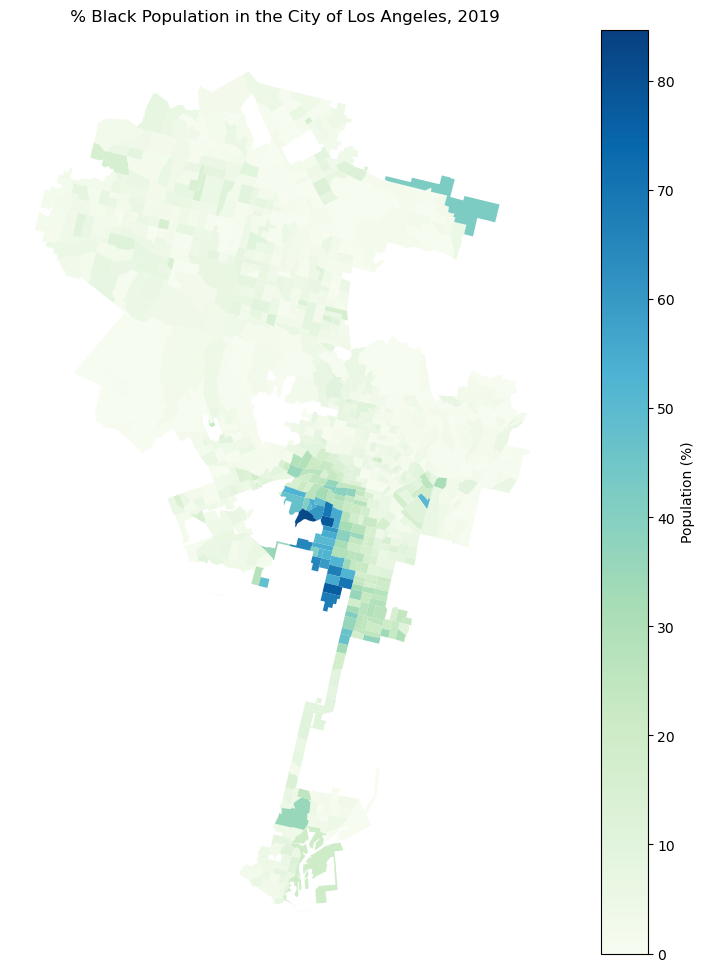

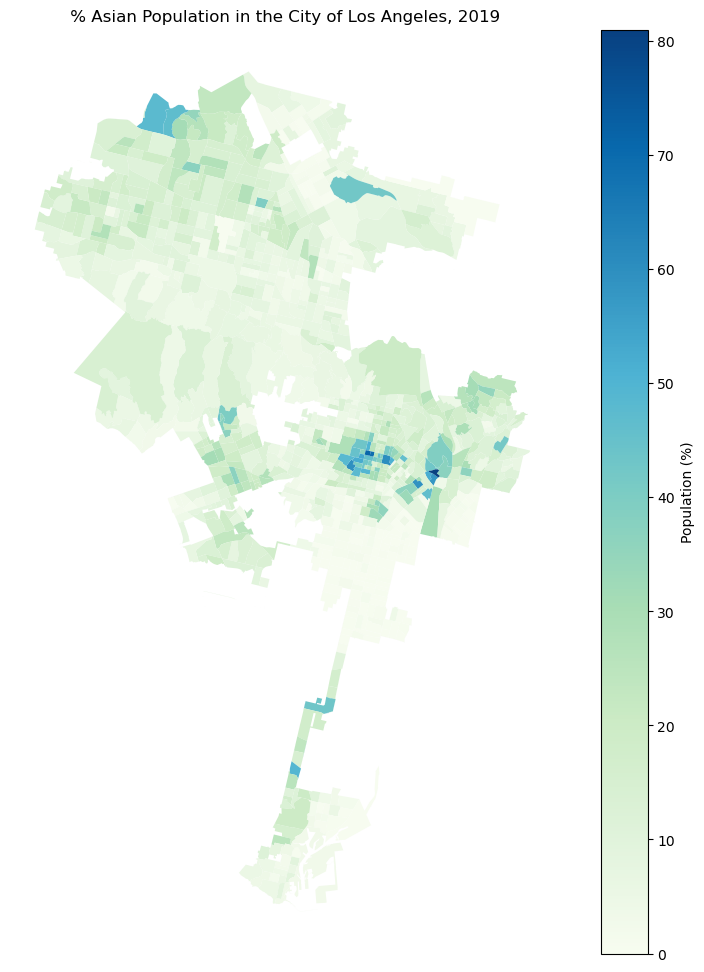

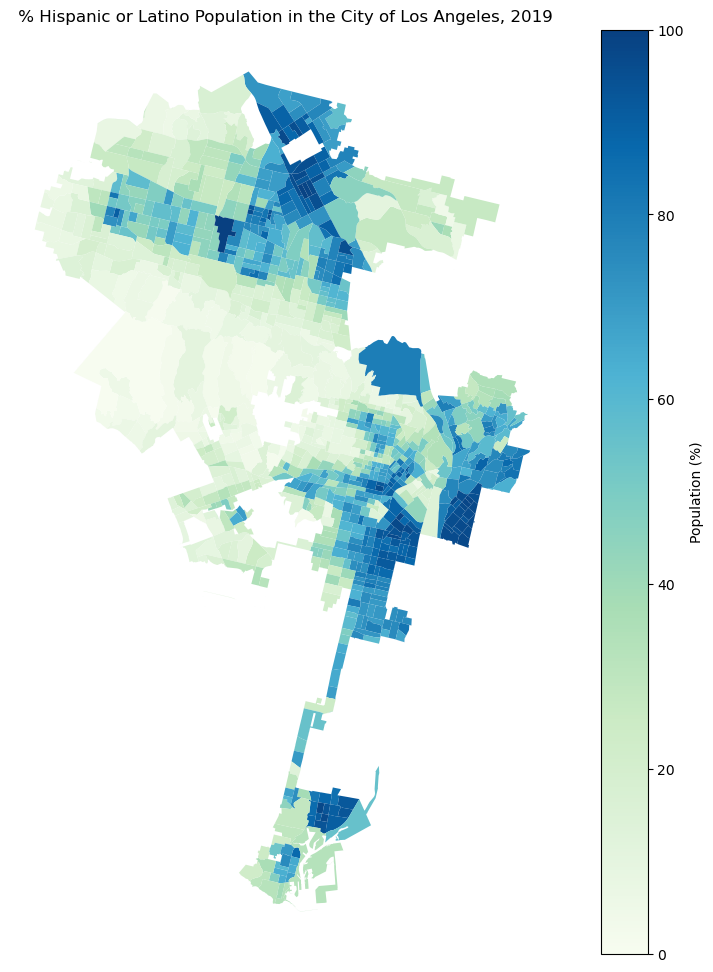

In [56]:
# loop!
plot_maps(la_race, race_map, "Population in the City of Los Angeles, 2019")

# Examining SCAG High Injury Network

In [57]:
HIN =gpd.read_file('data4/High_Injury_Network_SCAG.geojson')

In [58]:
# filtering HIN for the City of LA
HINla = HIN[HIN.CITY == 'Los Angeles']

In [59]:
# spatial join 
# error message because there is a mismatch between the projection 
# la_race = ESRI:102003 and HINla = EPSG = 4326
# first line of code is converting 

la_race = la_race.to_crs('EPSG:4326')
print("Original CRS:" , la_race.crs)

Original CRS: EPSG:4326


# Spatial Joins 

In [60]:
# spatial join 
# error message because there is a mismatch between the projection 
# la_race = ESRI:102003 and HINla = EPSG = 4326
# Here I converted the dataframe 

la_race = la_race.to_crs('EPSG:4326')
la_race.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [61]:
#conducting a spatial join, however, it is not necessary for overlaying the map 
# helpful for conducitng another layer of analysis
#keep for now 
la_race_HIN =gpd.sjoin(la_race,HINla)
la_race_HIN

GISJOIN STATEFP COUNTYFP TRACTCE        GEOID     NAME  \
0     G0600370101110      06      037  101110  06037101110  1011.10   
0     G0600370101110      06      037  101110  06037101110  1011.10   
1     G0600370101122      06      037  101122  06037101122  1011.22   
2     G0600370101210      06      037  101210  06037101210  1012.10   
2     G0600370101210      06      037  101210  06037101210  1012.10   
...              ...     ...      ...     ...          ...      ...   
1166  G0600370980031      06      037  980031  06037980031  9800.31   
1166  G0600370980031      06      037  980031  06037980031  9800.31   
1166  G0600370980031      06      037  980031  06037980031  9800.31   
1166  G0600370980031      06      037  980031  06037980031  9800.31   
1167  G0600370980033      06      037  980033  06037980033  9800.33   

                  NAMELSAD  MTFCC FUNCSTAT       ALAND  ...  FATALITY_VICTIM  \
0     Census Tract 1011.10  G5020        S   1142401.0  ...              3.0   
0     Census Tract 1011.10  G5020        S   1142401.0  ...              1.0   
1     Census Tract 1011.22  G5020        S   2644045.0  ...              0.0   
2     Census Tract 1012.10  G5020        S    650690.0  ...              0.0   
2     Census Tract 1012.10  G5020        S    650690.0  ...              3.0   
...                    ...    ...      ...         ...  ...              ...   
1166  Census Tract 9800.31  G5020        S  12641938.0  ...              0.5   
1166  Census Tract 9800.31  G5020        S  12641938.0  ...              0.0   
1166  Census Tract 9800.31  G5020        S  12641938.0  ...              0.0   
1166  Census Tract 9800.31  G5020        S  12641938.0  ...              0.0   
1167  Census Tract 9800.33  G5020        S  12666626.0  ...              0.0   

     SEVERE_INJURY_VICTIM VICTIM_COUNT  HIN_AUTO  HIN_PED  HIN_BIKE HIN_ALL  \
0                     6.0          9.0       Yes      Yes       Yes     Yes   
0                     0.0          1.0       Yes       No        No     Yes   
1                     0.5          0.5       Yes       No        No     Yes   
2                     4.5          4.5       Yes      Yes        No     Yes   
2                     6.0          9.0       Yes      Yes       Yes     Yes   
...                   ...          ...       ...      ...       ...     ...   
1166                  0.5          1.0       Yes       No        No     Yes   
1166                  1.0          1.0       Yes       No        No     Yes   
1166                  2.0          2.0        No      Yes       Yes     Yes   
1166                  4.0          4.0        No      Yes       Yes     Yes   
1167                  1.0          1.0       Yes       No        No     Yes   

     TRANSIT_AREA EQUITY_AREA  YEAR  
0              No         Yes  2022  
0              No         Yes  2022  
1              No         Yes  2022  
2              No         Yes  2022  
2              No         Yes  2022  
...           ...         ...   ...  
1166           No         Yes  2022  
1166           No         Yes  2022  
1166           No         Yes  2022  
1166           No         Yes  2022  
1167           No         Yes  2022  

[4436 rows x 57 columns]

# Function and loop for HIN over Race & Ethnicity 

In [62]:
#creating a function

def plot_maps2(data, columns, title_prefix):  

     for column in columns:
        fig, ax = plt.subplots(1, 1, figsize=(12, 12))
        la_race.plot(ax=ax,column=column,legend=True,cmap='GnBu',
             legend_kwds={"label": "Population (%)", "orientation": "vertical"})

        HINla.plot(ax=ax, color='red', markersize=.001)
       
        ax.axis('off')
        ax.set_title (f" {title_prefix} {column} Population in the City of Los Angeles, 2019")


In [63]:
#columns to plot 
HIN_mapLA = ['% White', '% Black', '% Asian', '% Hispanic or Latino']

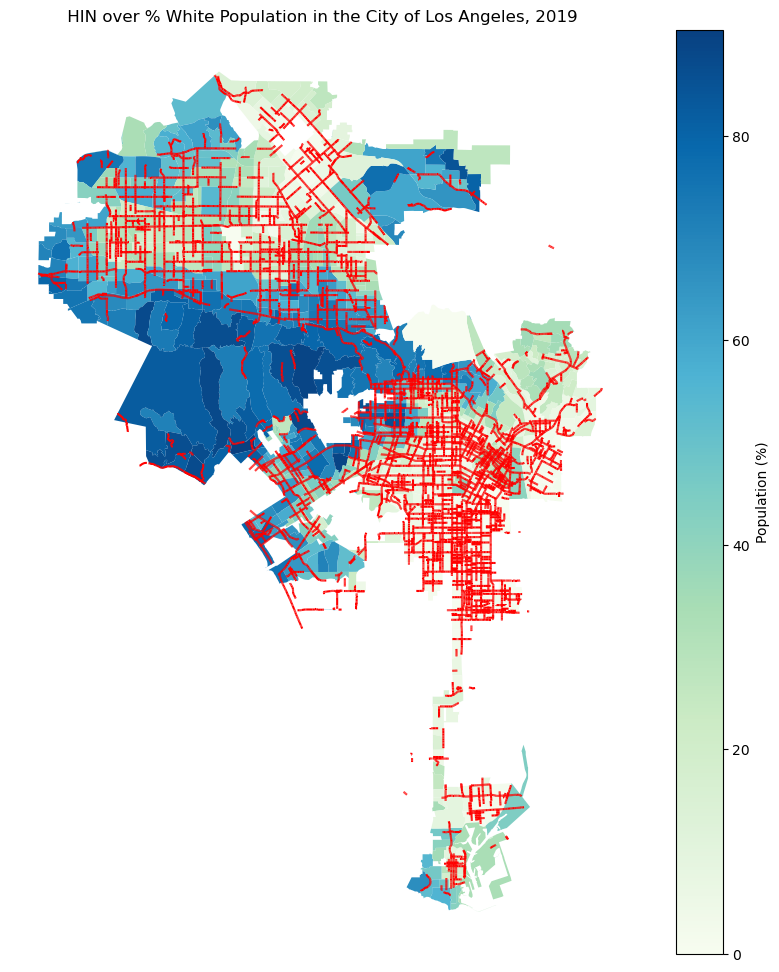

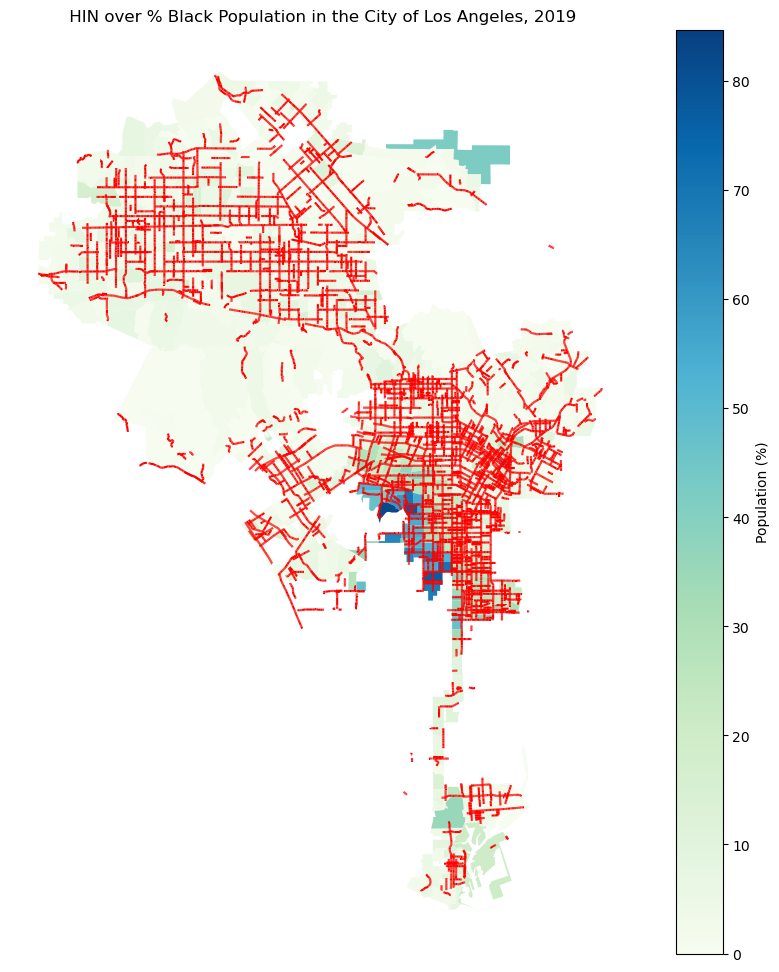

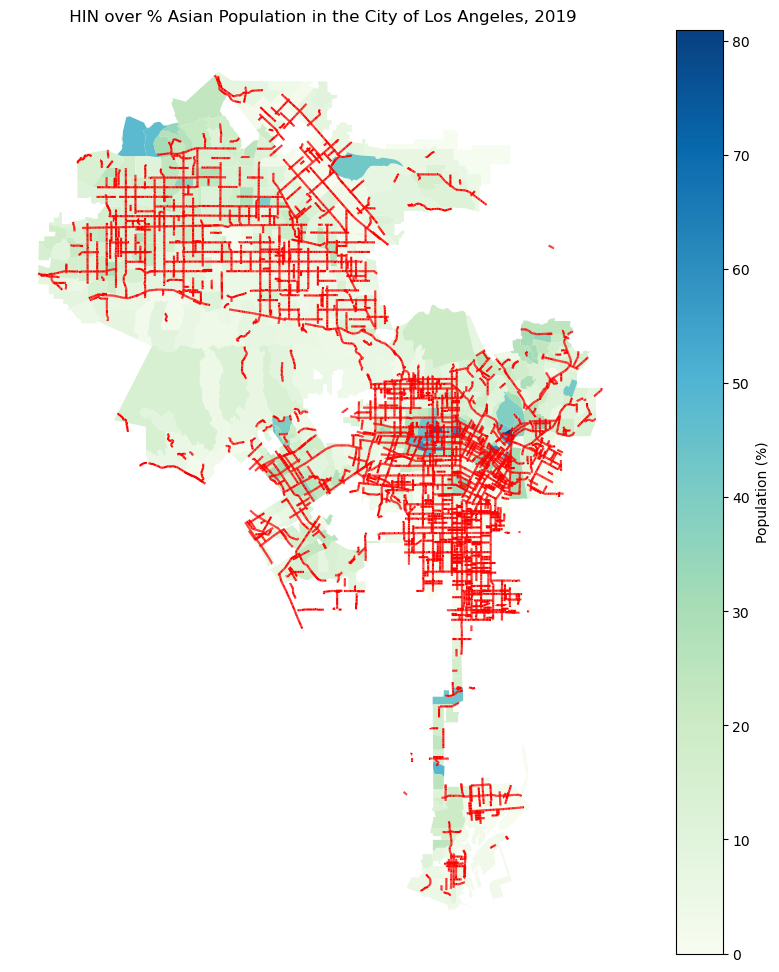

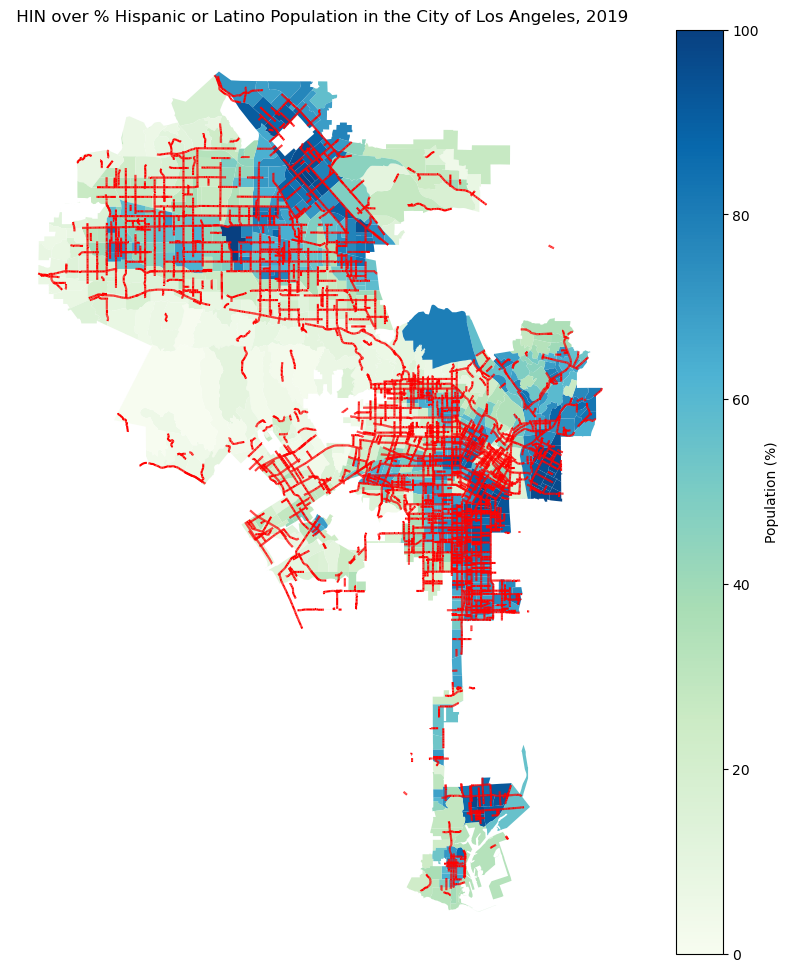

In [64]:
plot_maps2(la_race, HIN_mapLA, "HIN over")

# Creating Interactive Maps

In [65]:
import folium 
from folium.features import GeoJsonTooltip

In [66]:
#setting up the interactive map 
m = folium.Map([34.0549, -118.2426], tiles="CartoDB positron")
m

In [67]:
# changing colors 
def style_function(feature):
    return {
        'color': 'red',  
        'weight': 3,  
        'opacity': 1.0,
    }



In [68]:
folium.GeoJson(
    HINla,
    name='HIN Network, 2019',
    style_function=style_function,
    tooltip=GeoJsonTooltip(
        fields=['SEGMENT_NAME', 'FATALITY_VICTIM', 'SEVERE_INJURY_VICTIM', 'VICTIM_COUNT'], 
        aliases=['Street Name:', 'Fatality:', 'Severe Injury:', 'Victim Count:']
    )
).add_to(m)

folium.LayerControl(collapsed=False).add_to(m)

m.save('map1.html')

m

# Team Contributions

Emily: function/loop for race/ethnicity  
Gema: spatial join for both HIN and City of LA Census Tracts & ranked top 10 tracts with the most HIN miles  
Veronica: function/loop for age 